In [50]:
import pandas as pd
from plotnine import  * 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [36]:
df = pd.read_csv('restaurant_data.csv')
df = df.rename(columns={col: '_'.join(col.split()) for col in df.columns})
df.head()

,Name,Location,Cuisine,Rating,Seating_Capacity,Average_Meal_Price,Marketing_Budget,Social_Media_Followers,Chef_Experience_Years,Number_of_Reviews,Avg_Review_Length,Ambience_Score,Service_Quality_Score,Parking_Availability,Weekend_Reservations,Weekday_Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating_Capacity        8368 non-null   int64  
 5   Average_Meal_Price      8368 non-null   float64
 6   Marketing_Budget        8368 non-null   int64  
 7   Social_Media_Followers  8368 non-null   int64  
 8   Chef_Experience_Years   8368 non-null   int64  
 9   Number_of_Reviews       8368 non-null   int64  
 10  Avg_Review_Length       8368 non-null   float64
 11  Ambience_Score          8368 non-null   float64
 12  Service_Quality_Score   8368 non-null   float64
 13  Parking_Availability    8368 non-null   object 
 14  Weekend_Reservations    8368 non-null   

In [38]:
df.shape

(8368, 17)

17 features = 13 numerical + 4 categorical

### Explore categorical features

In [40]:
df['Parking_Availability'].value_counts()

Parking_Availability
Yes    4189
No     4179
Name: count, dtype: int64

In [41]:
df['Location'].value_counts()

Location
Downtown    2821
Suburban    2785
Rural       2762
Name: count, dtype: int64

In [42]:
df['Cuisine'].value_counts()

Cuisine
French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: count, dtype: int64

Potenitally create dummy variables?

### Explore numerical features

In [43]:
df.describe()

,Rating,Seating_Capacity,Average_Meal_Price,Marketing_Budget,Social_Media_Followers,Chef_Experience_Years,Number_of_Reviews,Avg_Review_Length,Ambience_Score,Service_Quality_Score,Weekend_Reservations,Weekday_Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [45]:
df.columns

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating_Capacity',
       'Average_Meal_Price', 'Marketing_Budget', 'Social_Media_Followers',
       'Chef_Experience_Years', 'Number_of_Reviews', 'Avg_Review_Length',
       'Ambience_Score', 'Service_Quality_Score', 'Parking_Availability',
       'Weekend_Reservations', 'Weekday_Reservations', 'Revenue'],
      dtype='object')

<Axes: >

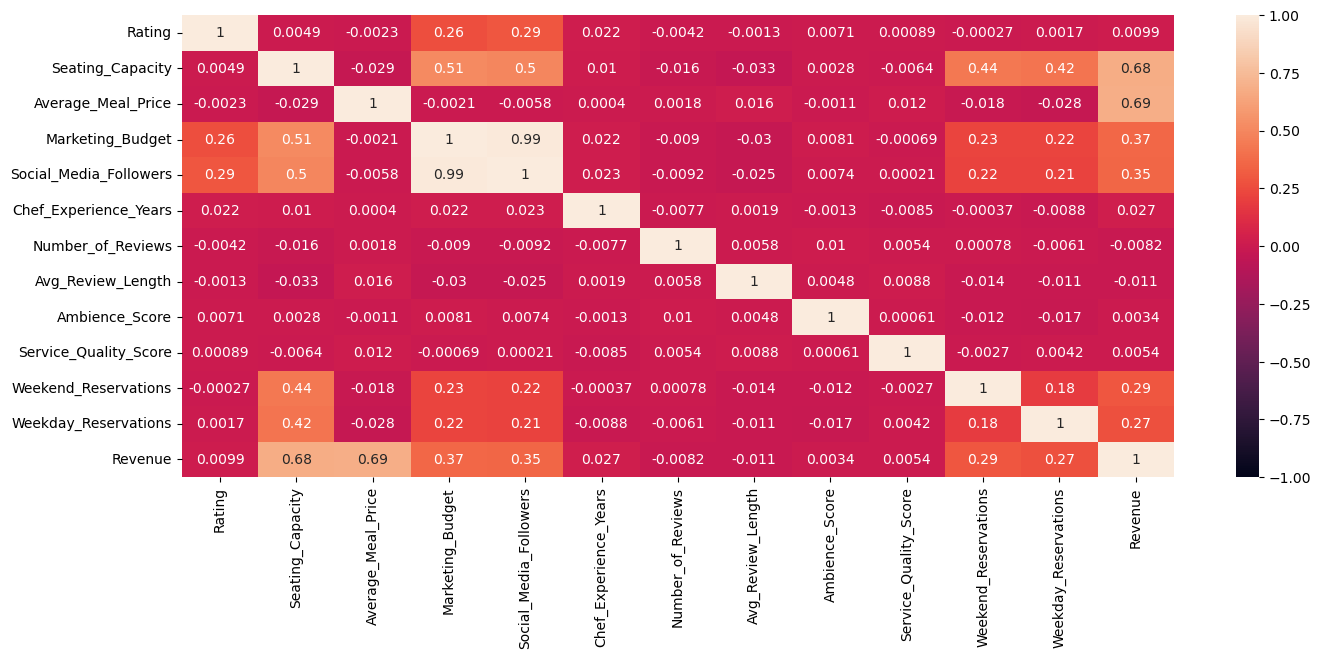

In [46]:
num_feats = ['Rating', 'Seating_Capacity',
       'Average_Meal_Price', 'Marketing_Budget', 'Social_Media_Followers',
       'Chef_Experience_Years', 'Number_of_Reviews', 'Avg_Review_Length',
       'Ambience_Score', 'Service_Quality_Score',
       'Weekend_Reservations', 'Weekday_Reservations', 'Revenue']

plt.figure(figsize=(16, 6))
sns.heatmap(df[num_feats].corr(), vmin=-1, vmax=1, annot=True)

Average Meal Price has highest correlation with Revenue. Potential to use for SLR.

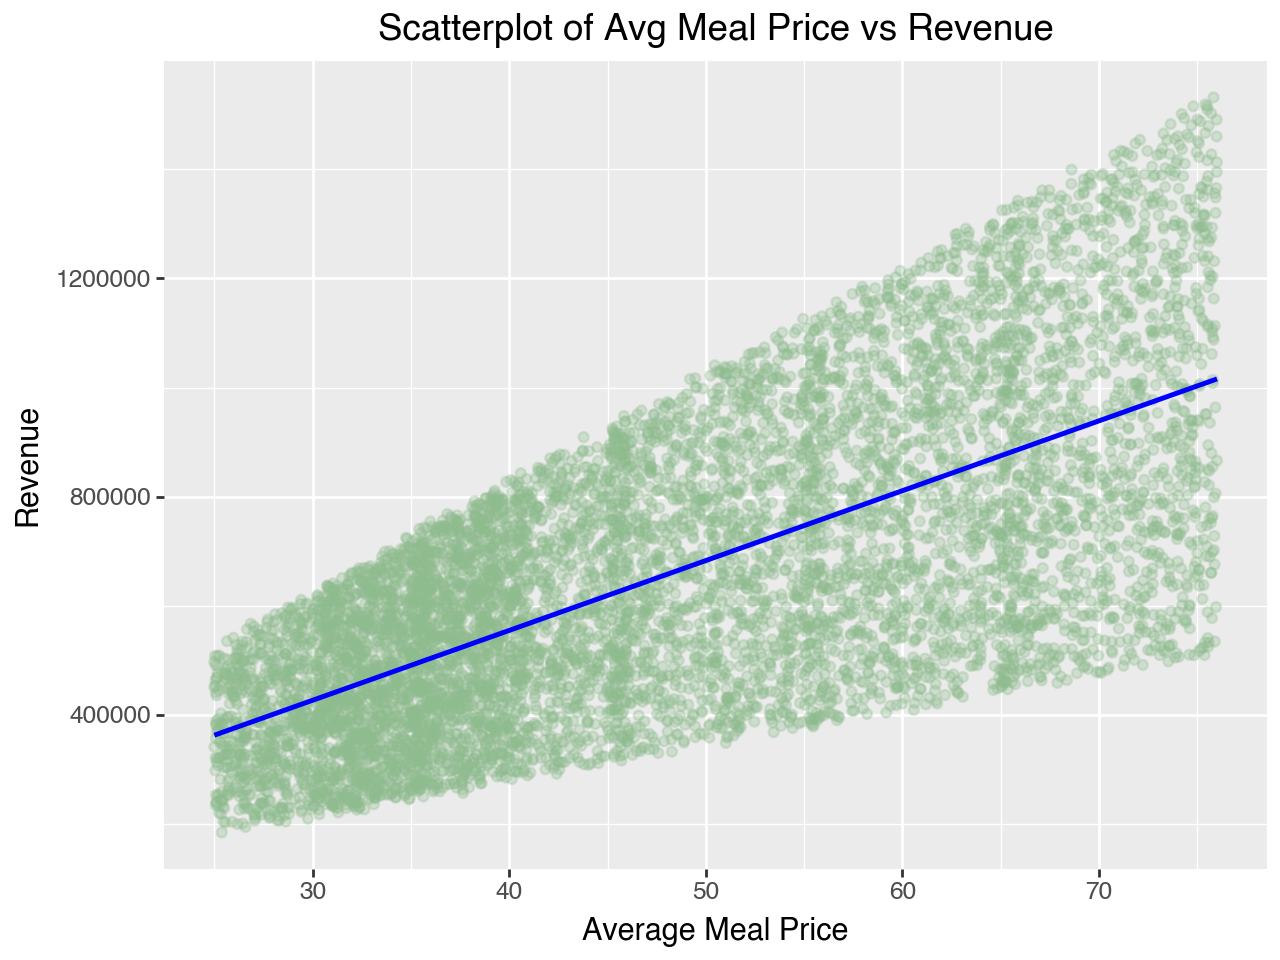

In [56]:
ggplot(df, aes(x='Average_Meal_Price', y='Revenue')) + \
    geom_jitter(alpha = 0.3, color='darkseagreen') + \
    geom_smooth(method='lm', color='blue', se=False) + \
    labs(title='Scatterplot of Avg Meal Price vs Revenue', x='Average Meal Price', y='Revenue')


In [49]:
model = smf.ols('Revenue ~ Average_Meal_Price',df).fit() #formula: 'y~x' or 'y~x1+x2+x3..'
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7452.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:51:51   Log-Likelihood:            -1.1378e+05
No. Observations:                8368   AIC:                         2.276e+05
Df Residuals:                    8366   BIC:                         2.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.288e+04   7414.771      5.784      0.000    2.83e+04    5.74e+04
Average_Meal_Price   1.28e+04    148.307     86.323      0.000    1.25e+04    1.31e+04
==============================================================================
Omnibus:                      229.111   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.194
Skew:                           0.028   Prob(JB):                     2.63e-25
Kurtosis:                       2.433   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Average_Meal_Price,1.0,2.818688e+14,2.818688e+14,7451.629514,0.0
Residual,8366.0,3.164562e+14,3.782647e+10,NaN,NaN


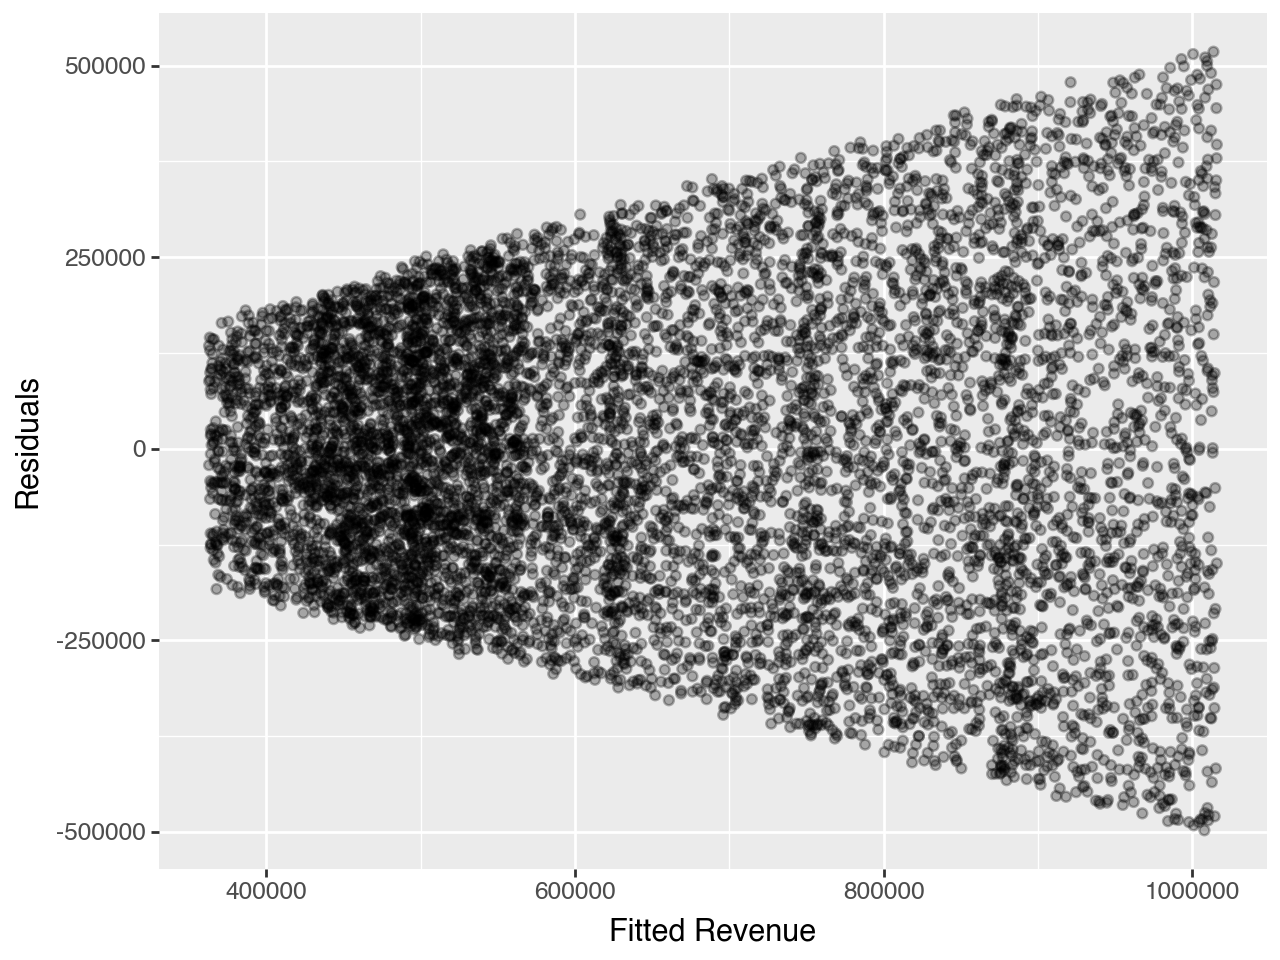

In [61]:
slr = df.copy()
slr.loc[:, 'predicted'] = model.fittedvalues
slr.loc[:, 'residuals'] = model.resid

ggplot(slr, aes(x='predicted', y='residuals')) + \
geom_point(alpha=0.3) + \
labs(x='Fitted Revenue', y='Residuals')

/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.


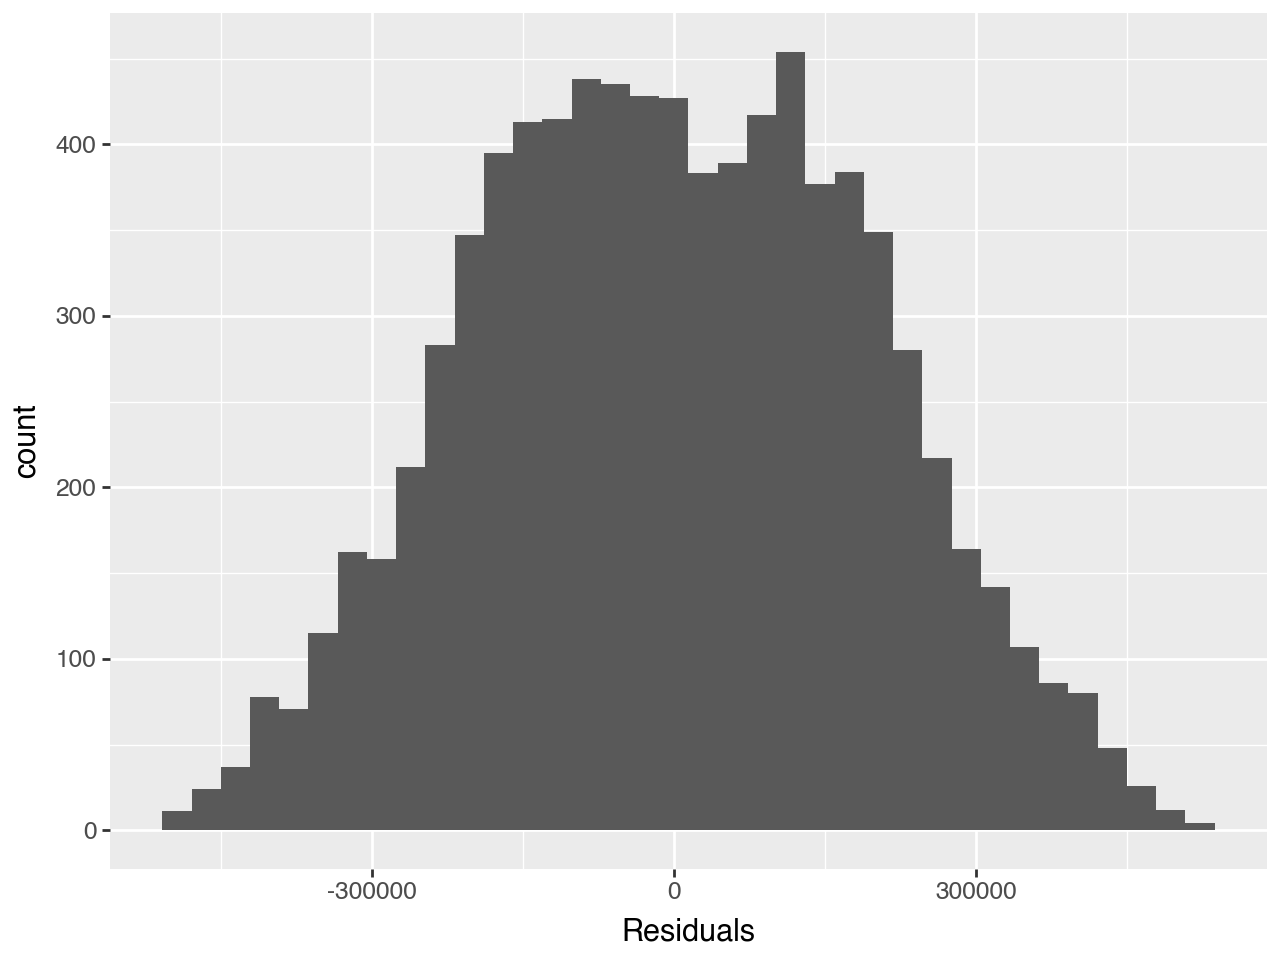

In [62]:
(ggplot(slr, aes(x='residuals')) +
    geom_histogram() +
    labs(x='Residuals'))

Normally distributed residuals

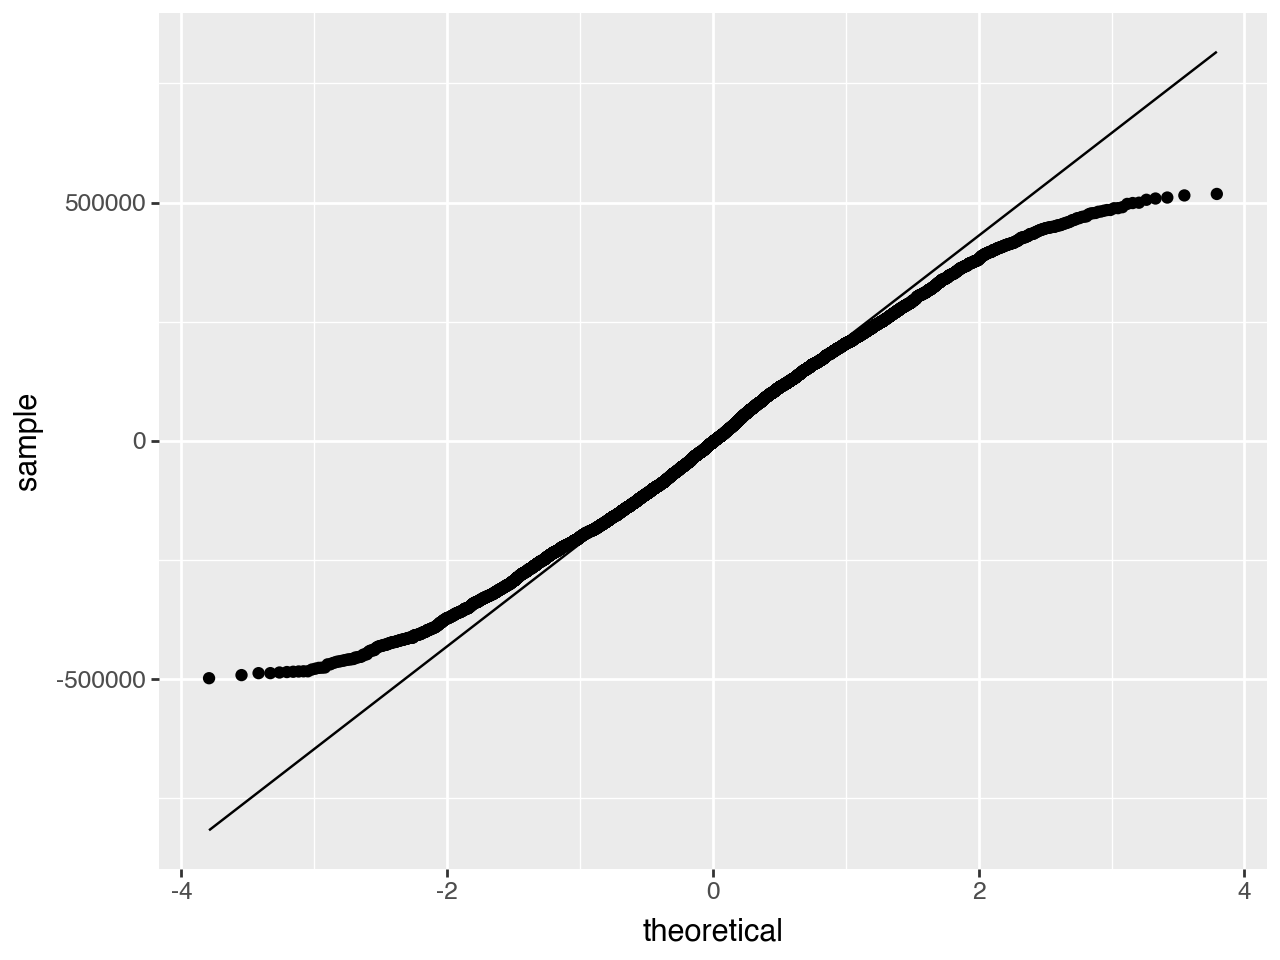

In [63]:
(ggplot(slr, aes(sample='residuals')) +
     stat_qq() + stat_qq_line())